# Regresión Logística
Usada para clasificación lineal, es decir, se pueden separar las clases usando una línea recta.
<img src="images/LinearClassSeparation.jpg" style="display:inline-block">
<img src="images/regresion_logistica.png" width=400 style="display:inline-block">

Las variables deben ser independientes entre ellas.

## Carga de datos

In [6]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
print(iris.keys())

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state = 97)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


## Creación de modelo

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,          # Regularización del Overfitting (alto == poca regularización)
                       penalty='l2',       # l1, l2, elasticnet, none - default='l2'
                       solver='lbfgs',
                       max_iter=1000)

**solver**{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

Algorithm to use in the optimization problem.

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
- ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
- ‘liblinear’ and ‘saga’ also handle L1 penalty
- ‘saga’ also supports ‘elasticnet’ penalty
- ‘liblinear’ does not support setting penalty='none'

## Entrenar y Testear

In [8]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, max_iter=1000)

In [9]:
lr.score(X_test,y_test)

0.9333333333333333

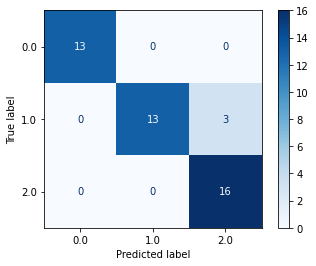

In [16]:
from loda_utils.ds import confusion_matrix
confusion_matrix(lr,X_test,y_test)